In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 16
plt.rcParams['figure.titlesize'] = 24

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))
print(data[:,0])
hf.close()

[9.40680016e+08 3.15000000e+02 4.50000000e+01 1.00000000e+01]


# Problem 1

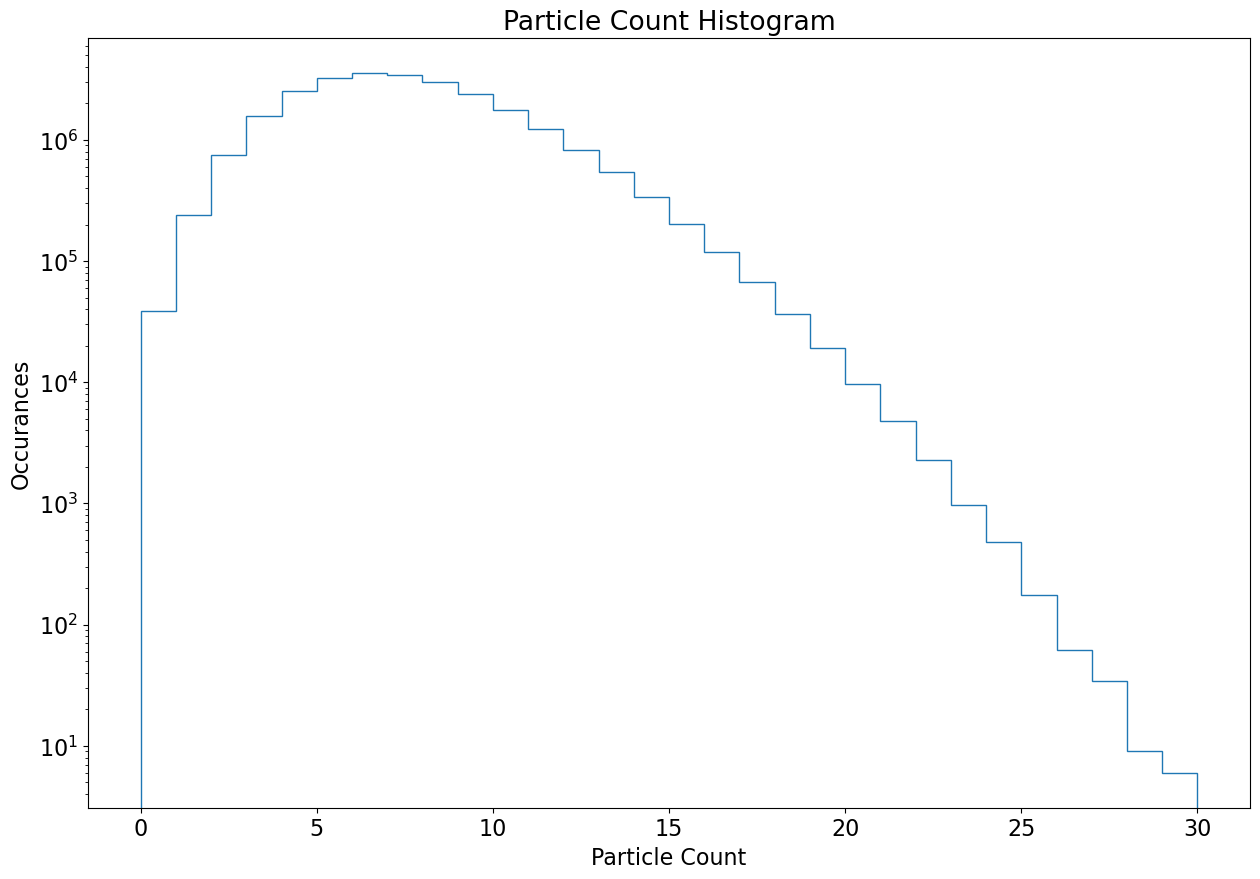

In [115]:
plt.hist(data[3],bins=30, histtype = 'step')
plt.semilogy()
plt.xlabel('Particle Count')
plt.ylabel('Occurances')
plt.title('Particle Count Histogram')
plt.show()

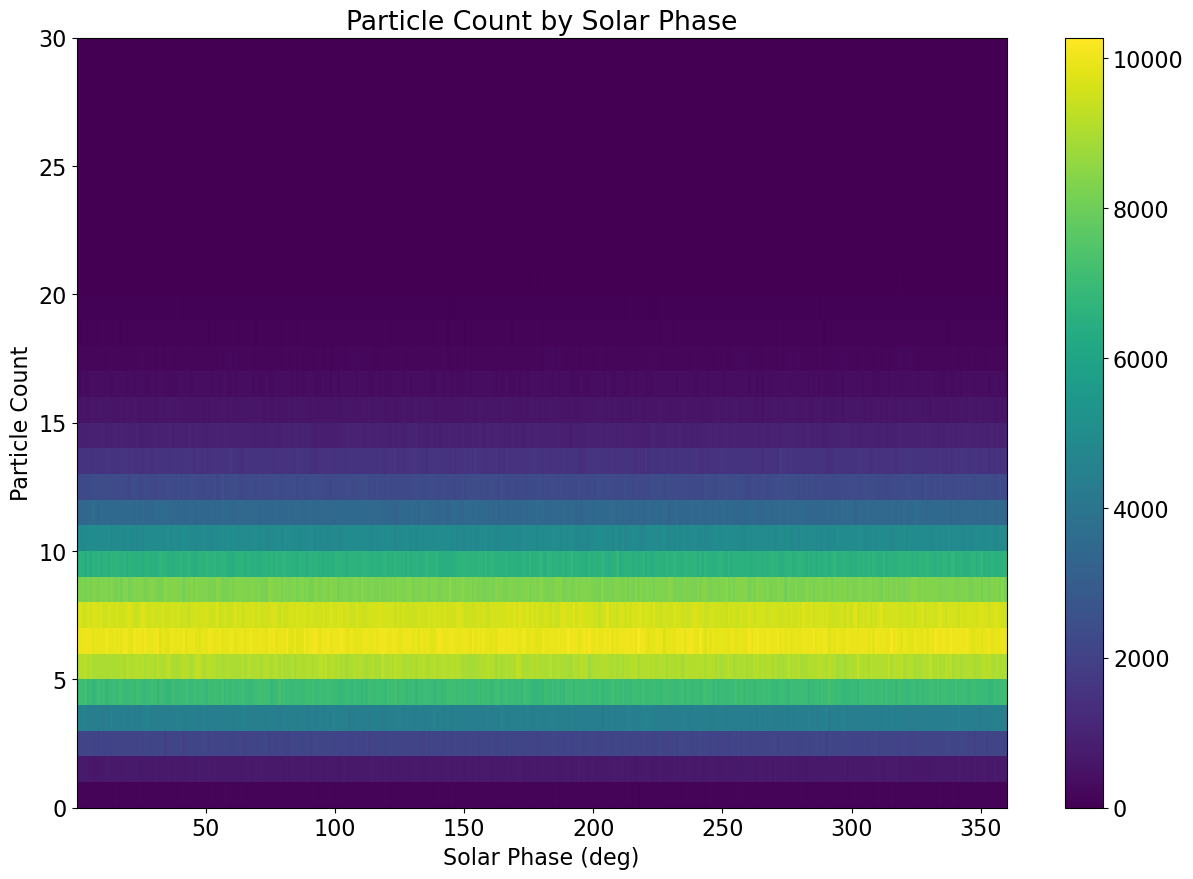

In [4]:
plt.hist2d(data[1], data[3], bins = [360,30])
plt.colorbar()
plt.title('Particle Count by Solar Phase')
plt.xlabel('Solar Phase (deg)')
plt.ylabel('Particle Count')
plt.show()

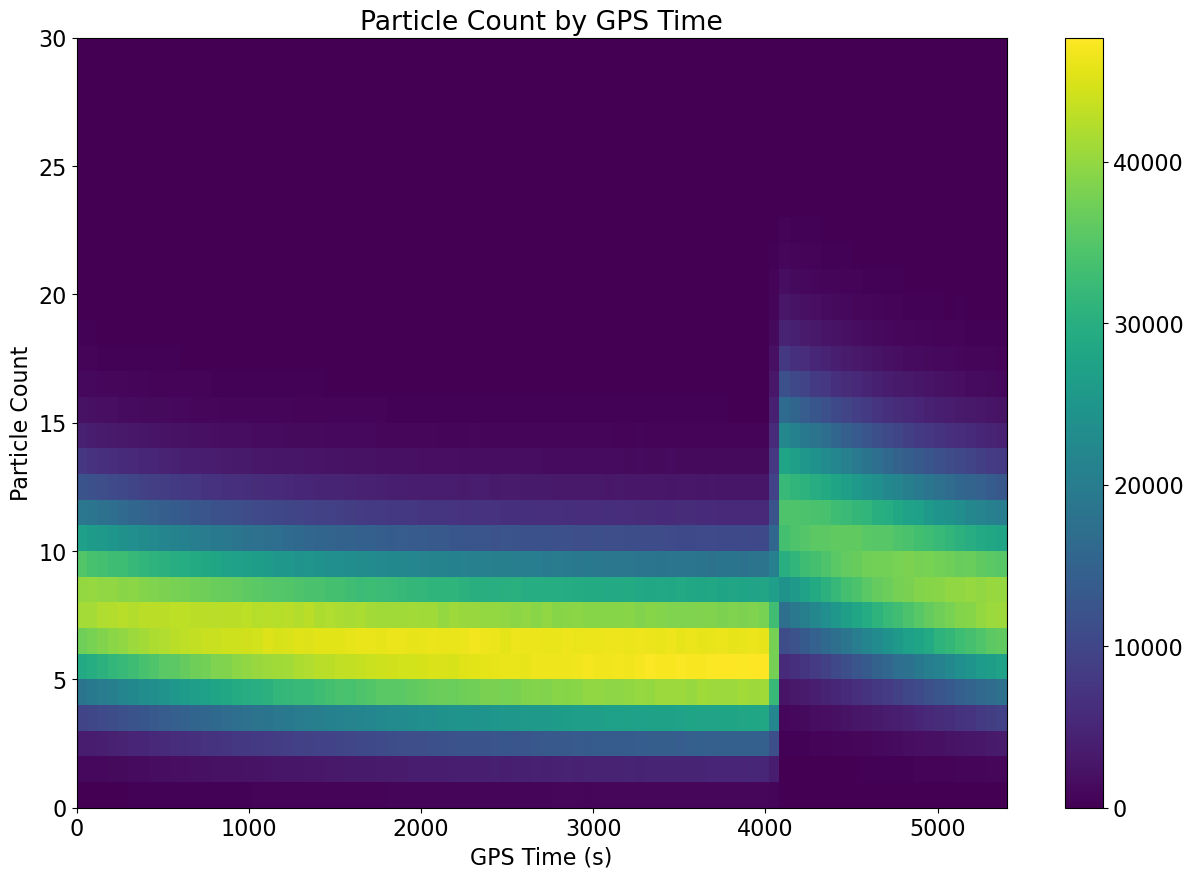

In [99]:
hist_data= plt.hist2d(data[0]%(90*60), data[3], bins = [90,30])
plt.title('Particle Count by GPS Time')
plt.xlabel('GPS Time (s)')
plt.ylabel('Particle Count')
plt.colorbar()
plt.show()

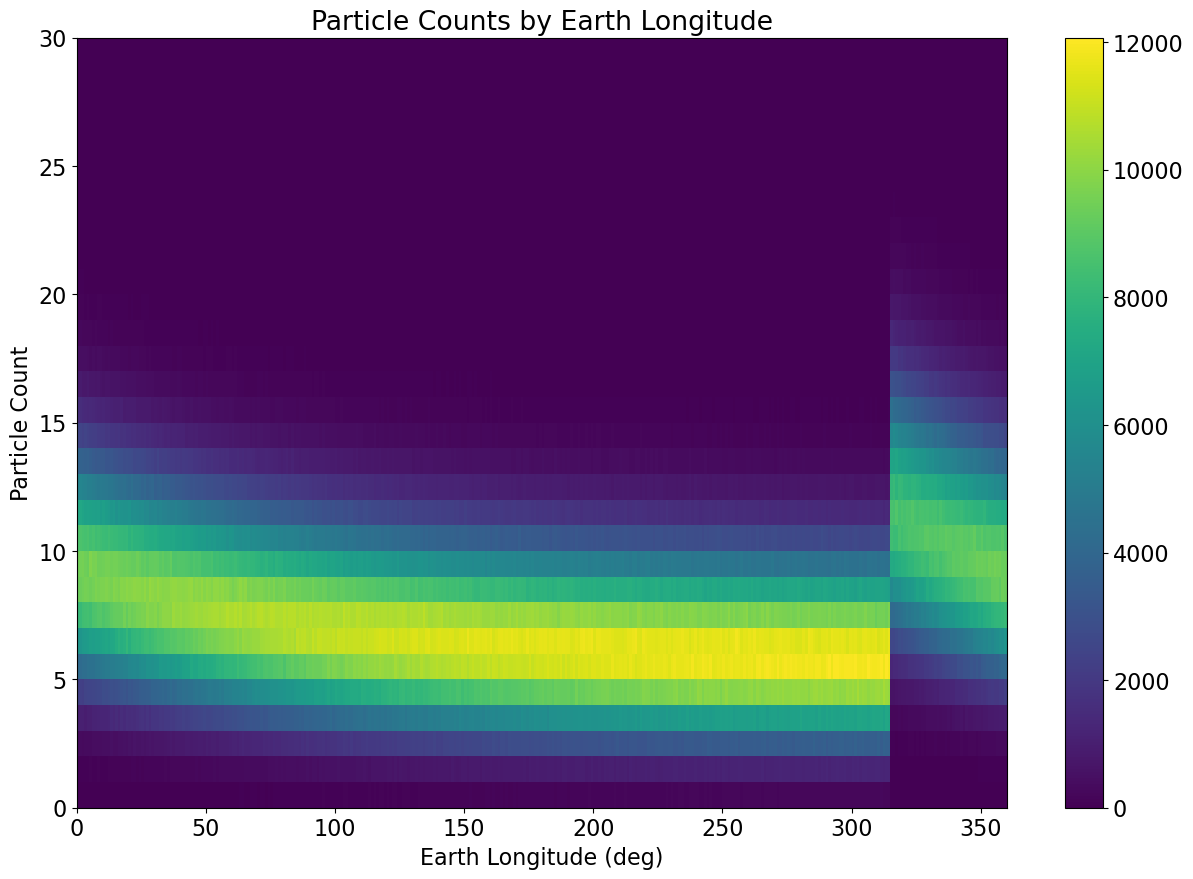

In [6]:
plt.hist2d(data[2], data[3], bins = [360,30])
plt.title('Particle Counts by Earth Longitude')
plt.xlabel('Earth Longitude (deg)')
plt.ylabel('Particle Count')
plt.colorbar()
plt.show()

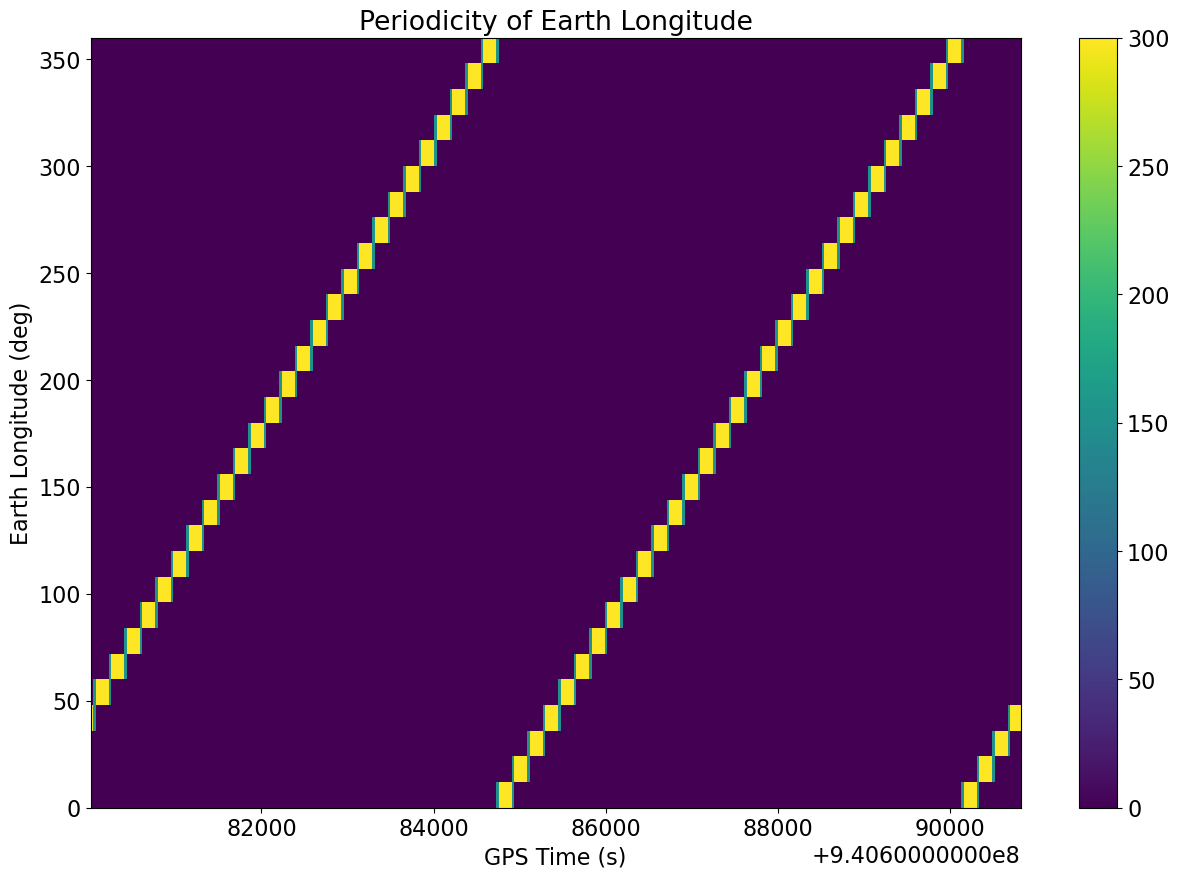

In [7]:
hrs3 = 60*60*3*10
plt.hist2d(data[0][:hrs3], data[2][:hrs3], bins = [360,30])
plt.title('Periodicity of Earth Longitude')
plt.xlabel('GPS Time (s)')
plt.ylabel('Earth Longitude (deg)')
plt.colorbar()
plt.show()

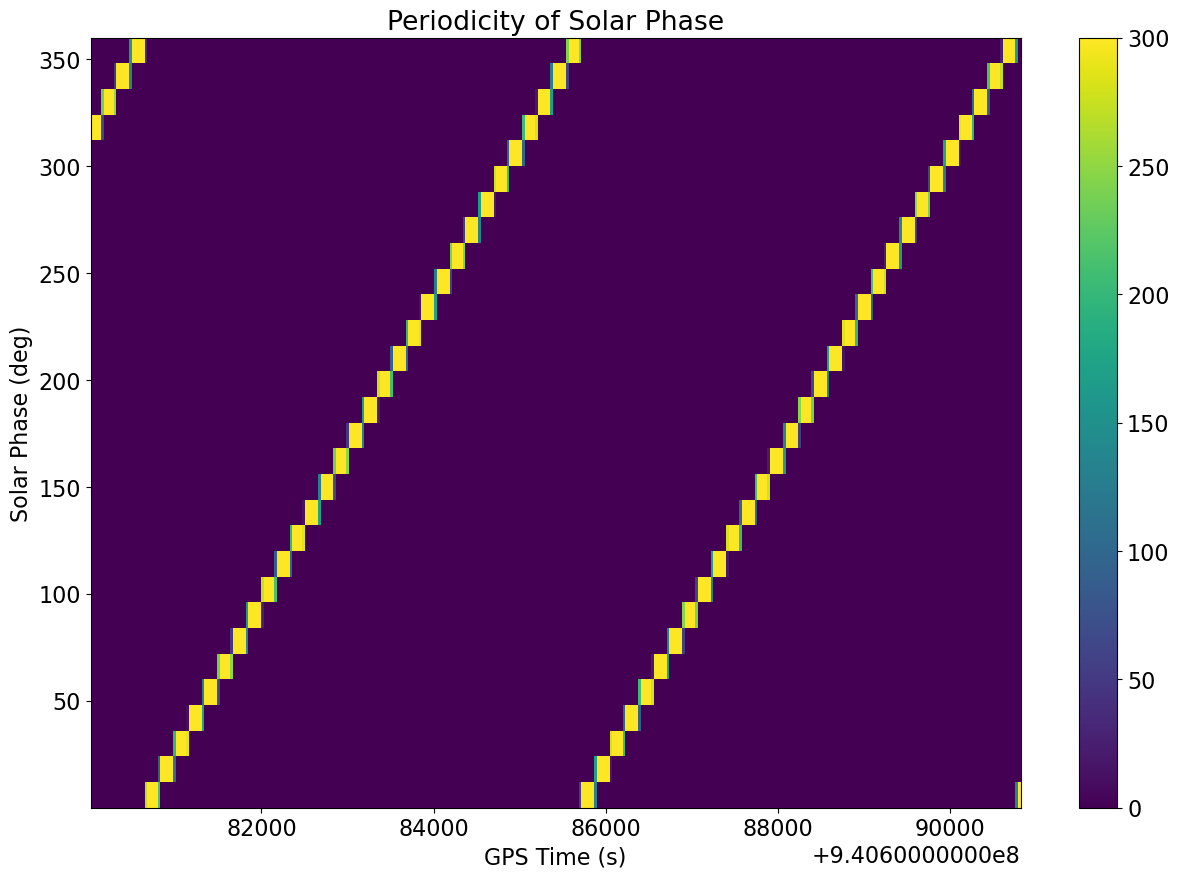

In [8]:
plt.hist2d(data[0][:hrs3], data[1][:hrs3], bins = [360,30])
plt.title('Periodicity of Solar Phase')
plt.xlabel('GPS Time (s)')
plt.ylabel('Solar Phase (deg)')
plt.colorbar()
plt.show()

1. The first plot shows a histogram of the particle count with a maximum of 30 particles. There is periodicity in the solar phase. It can be seen in the way the solar phase starts at 0 degrees, linearly increases until it gets to 360 degrees and then starts over at 0 degrees. The data also shows a 90 minute periodicity in Earth longitude where the longitude starts at 0, goes to 360 and starts over from 0. In the 'Particle Count by Earth Longitude' plot, there is an offset that occurs around 310 degrees. At greater than 310 degrees, there are more particles detected overall. This suggests that there is signal contamination for data from 310 degrees to 360 degrees. The background probability distribution can be constructed by looking at the distribution of particle counts binned by the other 3 column values.

2. The background signal looks like an exponential decay from the range of -45 degrees to 315 degrees which occurs every 90 mins.

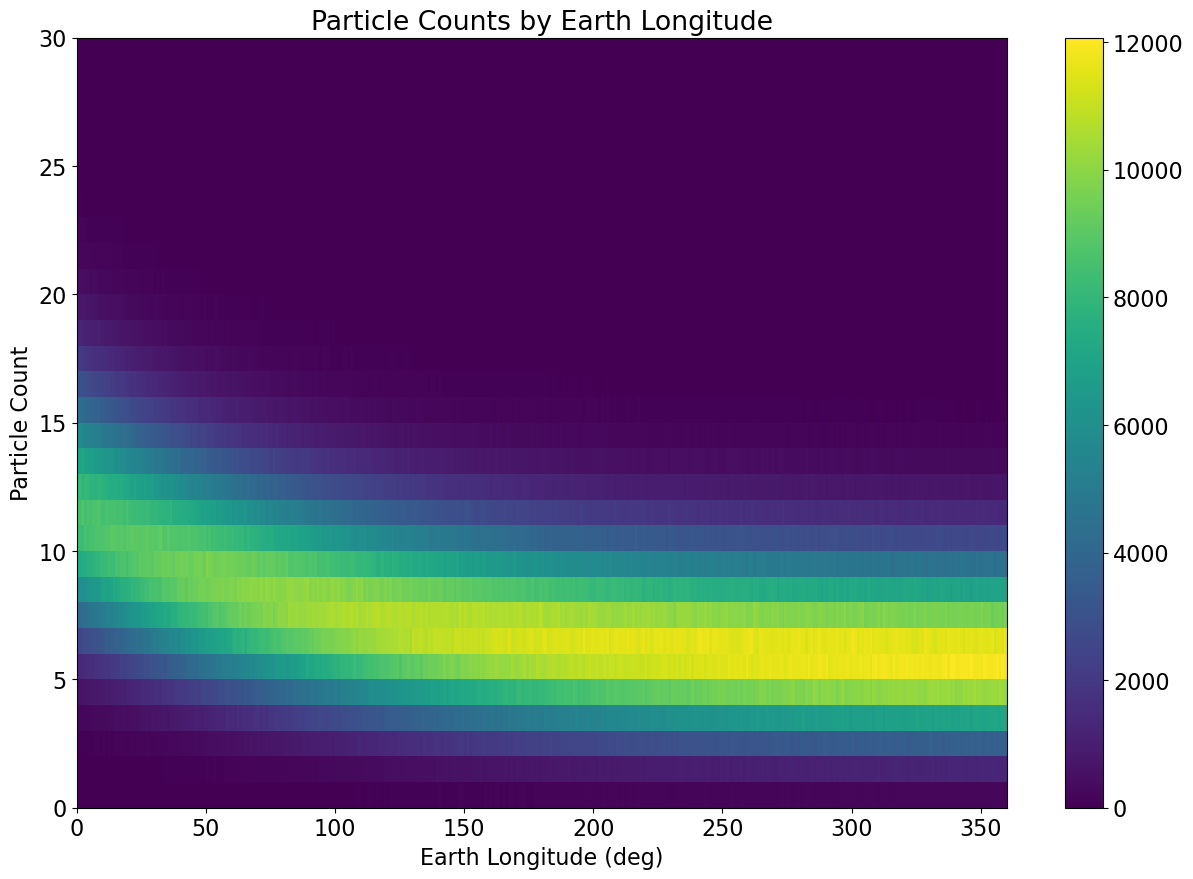

In [9]:
t = (data[2]+45)%360

plt.hist2d(t, data[3], bins = [360,30])
plt.title('Particle Counts by Earth Longitude')
plt.xlabel('Earth Longitude (deg)')
plt.ylabel('Particle Count')
plt.colorbar()
plt.show()

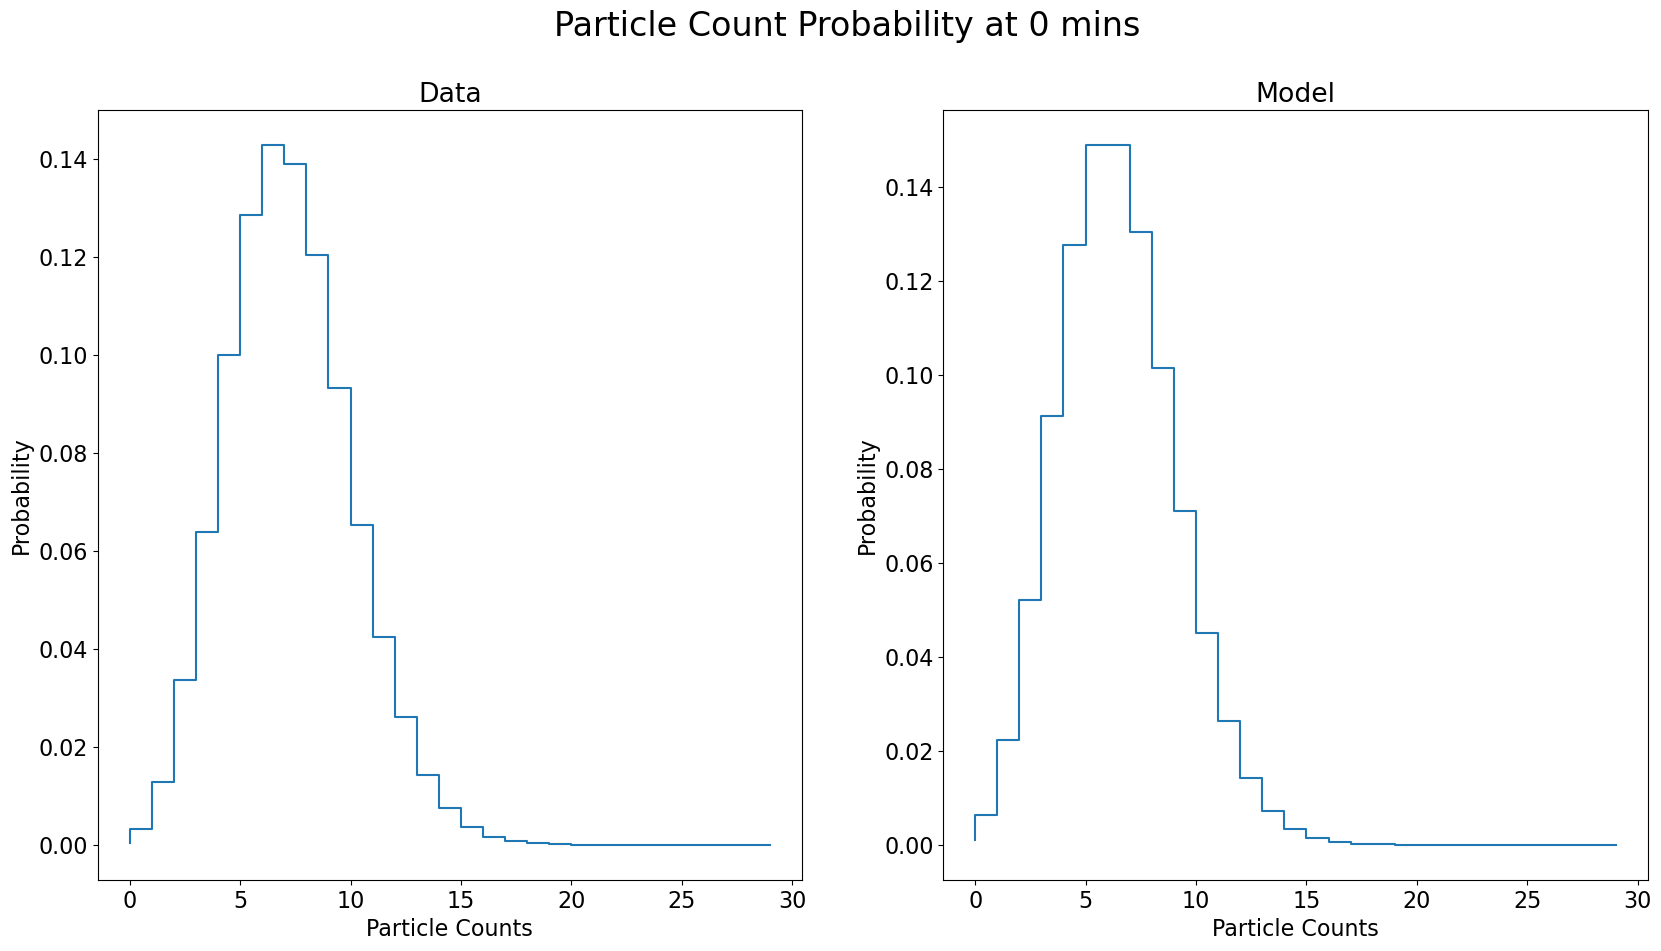

In [113]:
# find the mode particle count for each minute
mode = []
for i in range(len(hist_data[0])):
    mode.append(np.argmax(hist_data[0][i]))

fig, ax = plt.subplots(1,2, figsize = (20,10))
x = np.arange(0,30)

ax[0].step(x, hist_data[0][0]/np.sum(hist_data[0][0]))
ax[1].step(x, stats.poisson.pmf(x, mode[0]))

for axis in ax:
    axis.set_xlabel('Particle Counts')
    axis.set_ylabel('Probability')
fig.suptitle('Particle Count Probability at 0 mins')
ax[0].set_title('Data')
ax[1].set_title('Model')
plt.show()

<ipython-input-134-a62730a100b1>:7: RuntimeWarning: divide by zero encountered in double_scalars
  percent_err.append(np.abs(data[i]-model[i])/data[i]*100)


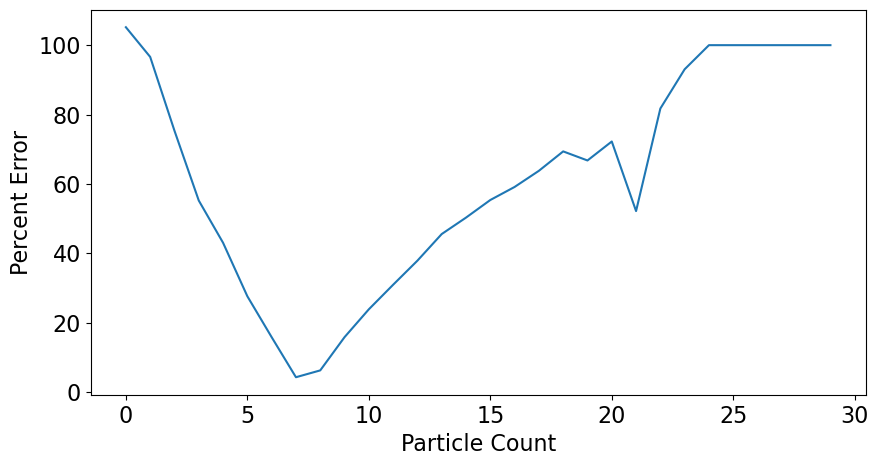

In [134]:
model = stats.poisson.pmf(x, mode[0])
#print(model)
data = hist_data[0][0]/np.sum(hist_data[0][0])
#print(data)
percent_err = []
for i in range(len(model)):
    percent_err.append(np.abs(data[i]-model[i])/data[i]*100)
percent_err = np.nan_to_num(percent_err, posinf=100)
#print(percent_err)

plt.plot(x,percent_err)
plt.xlabel('Particle Count')
plt.ylabel('Percent Error')
plt.show()

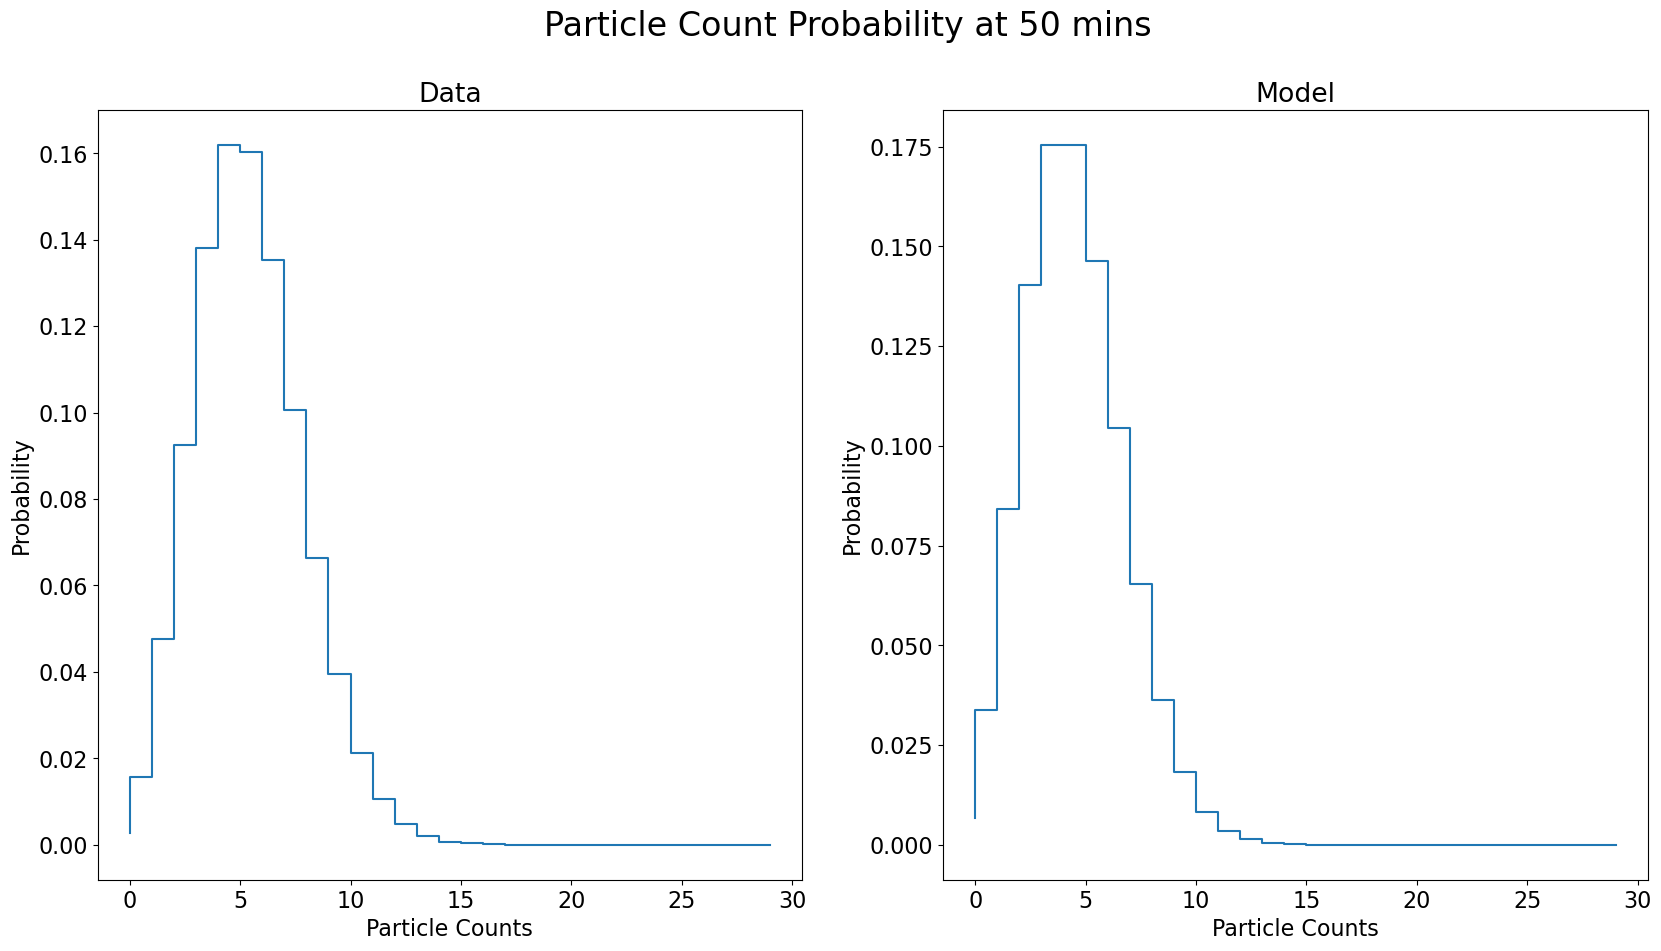

In [114]:
fig, ax = plt.subplots(1,2, figsize = (20,10))
x = np.arange(0,30)
ax[0].step(x, hist_data[0][50]/np.sum(hist_data[0][50]))
ax[1].step(x, stats.poisson.pmf(x, mode[50]))
for axis in ax:
    axis.set_xlabel('Particle Counts')
    axis.set_ylabel('Probability')
fig.suptitle('Particle Count Probability at 50 mins')
ax[0].set_title('Data')
ax[1].set_title('Model')
plt.show()

model = stats.poisson.pmf(x, mode[50])
#print(model)
data = hist_data[0][50]/np.sum(hist_data[0][50])
#print(data)
percent_err = []
for i in range(len(model)):
    percent_err.append(np.abs(data[i]-model[i])/data[i]*100)
percent_err = np.nan_to_num(percent_err, posinf=100)
#print(percent_err)

plt.plot(x,percent_err)
plt.xlabel('Particle Count')
plt.ylabel('Percent Error')
plt.show()

3. I would say my model does not do a good job. The model is more accurate when the particle count is close to the mode particle count. At the front and end tails of the distribution, there is over 100% error.

4. Using my model, I look at times 0, 10, 50, 80 mins. The 5$\sigma$ values for those times are 24, 22, 20, and 28 respectively.

In [138]:
prob5sigma = 1/3.5e6
time = [0, 10, 50, 80]
particle_count = []
for i in time:
    particle_count.append(stats.poisson.isf(prob5sigma, mode[i]))
print(particle_count)

[24.0, 22.0, 20.0, 28.0]


# Problem 2

In [2]:
hf = h5py.File('images.h5', 'r')
data = np.array(hf.get('imagestack'))
hf.close()

In [3]:
data.shape

(200, 200, 10)

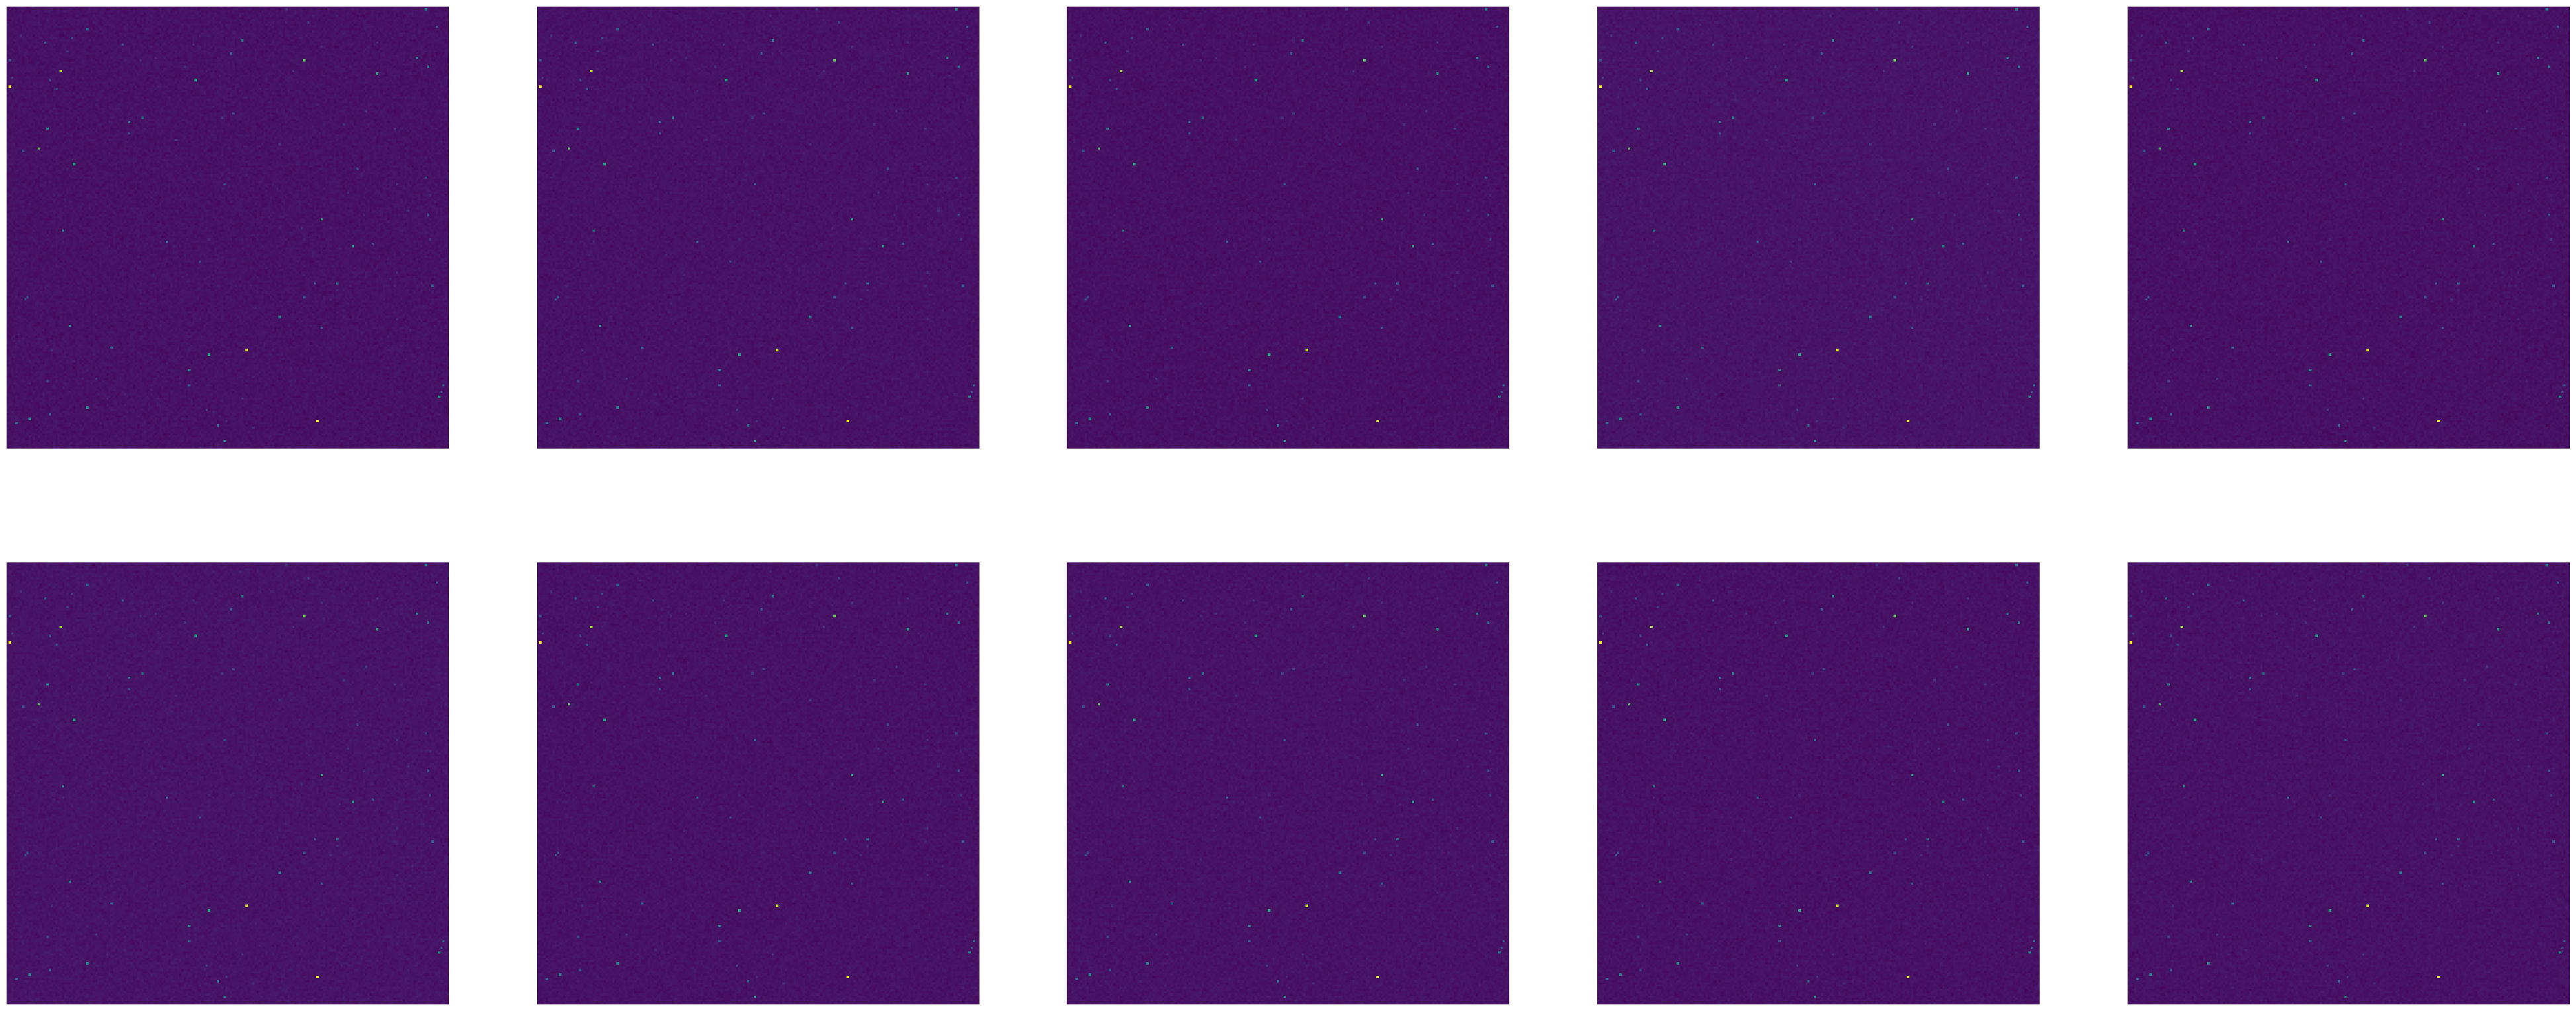

In [20]:
# first look at the images
fig, ax = plt.subplots(2,5, figsize = (50,20))
for i in range(5):
    ax[0,i].imshow(data[...,i])
    ax[0,i].axis('off')
for i in range(5):
    ax[1,i].imshow(data[...,i+5])
    ax[1,i].axis('off')
plt.show()

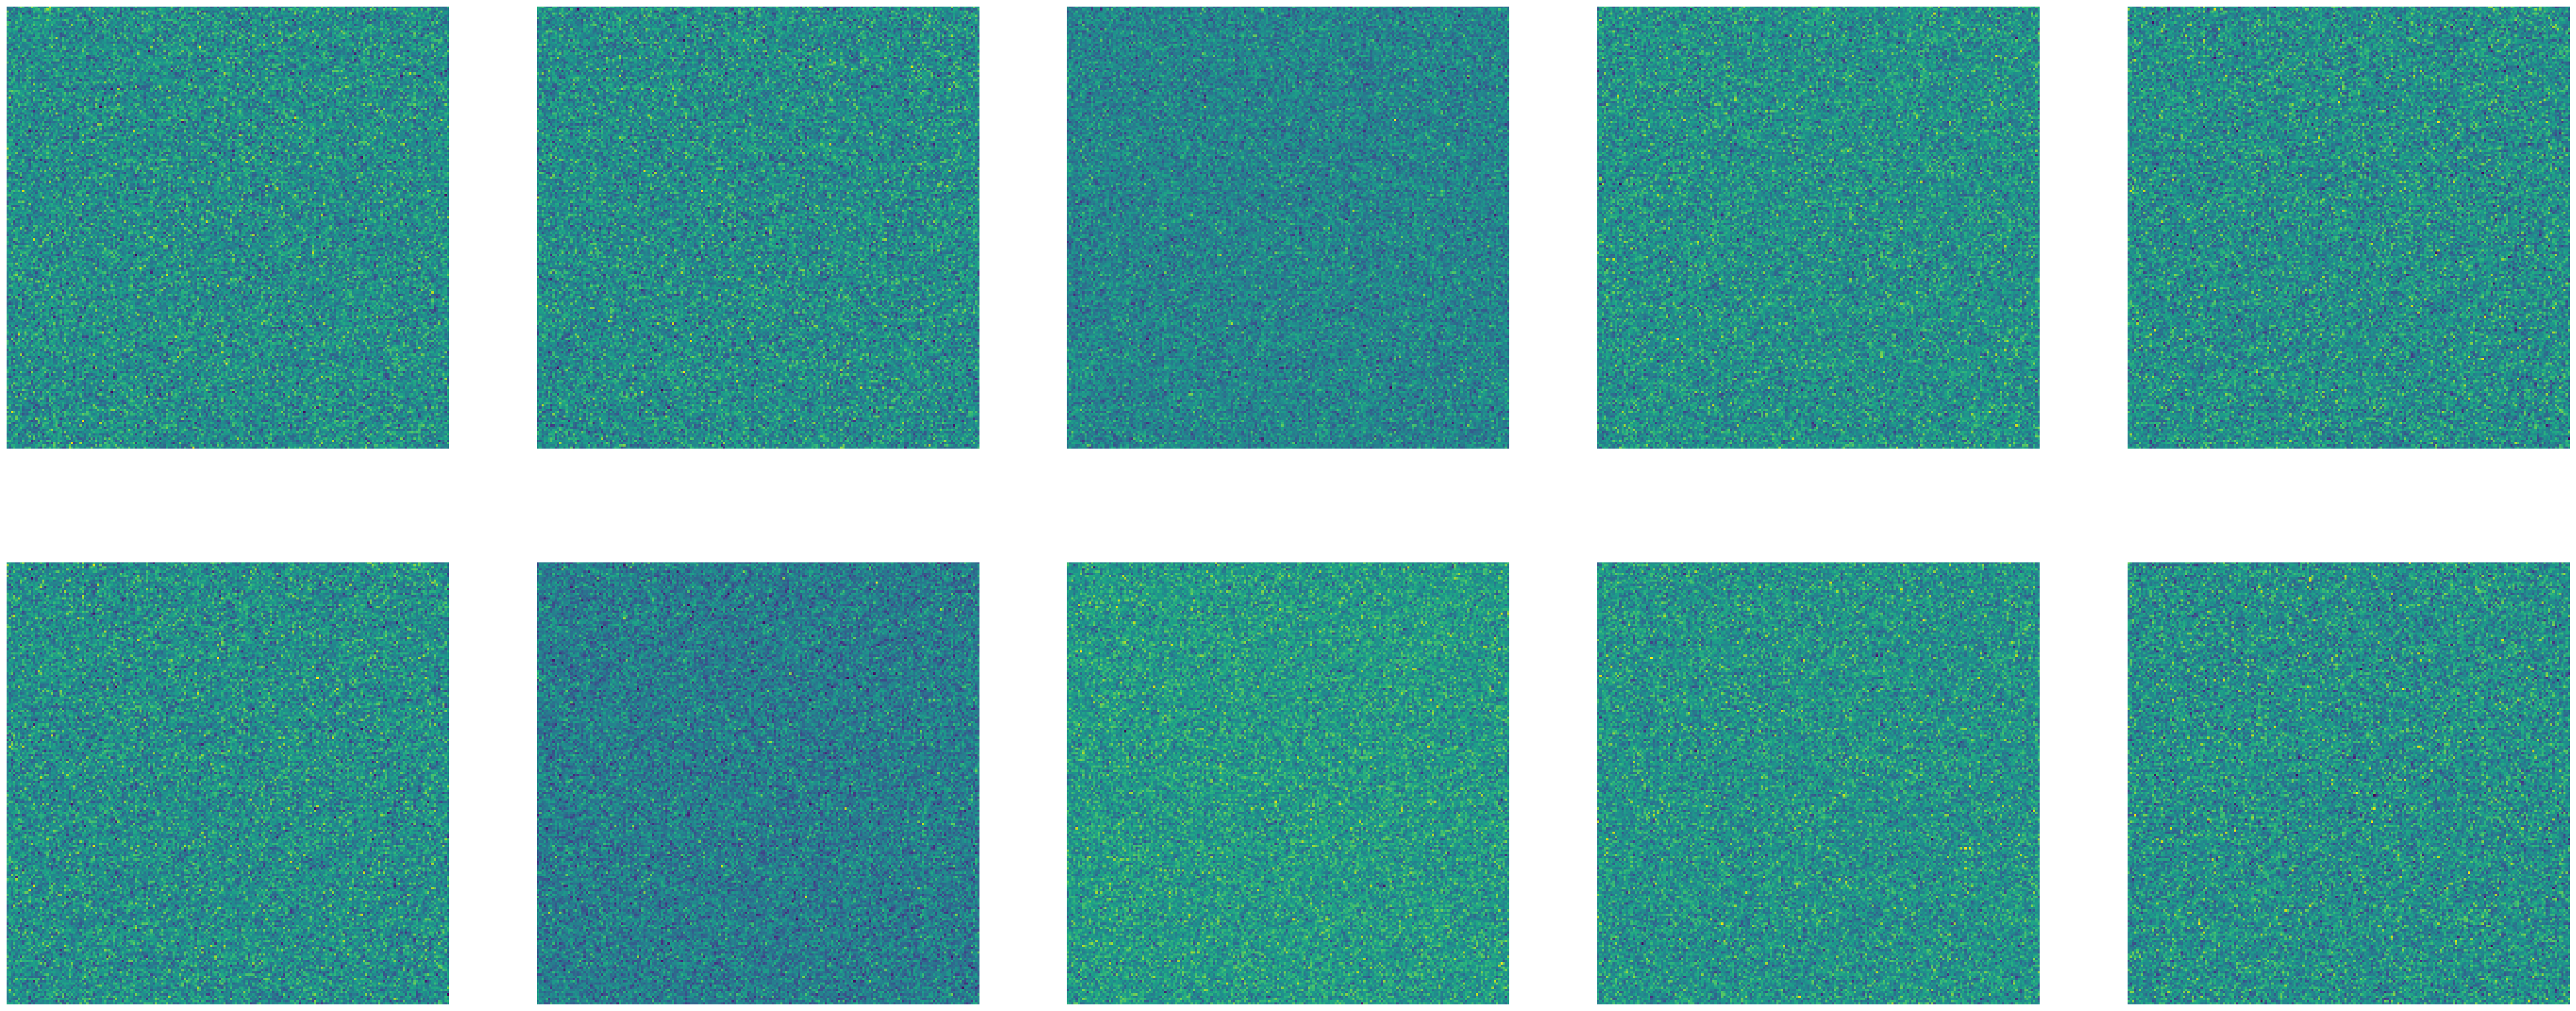

In [34]:
#show the noise by subtracting 1 image from another
images = []
for i in range(10):
    images.append(data[...,i])
noise = []
for i in range(9):
    noise.append(images[i]-images[i+1])
    
fig, ax = plt.subplots(2,5, figsize = (50,20))
for i in range(5):
    ax[0,i].imshow(noise[i])
    ax[0,i].axis('off')
for i in range(5):
    ax[1,i].imshow(noise[i+4])
    ax[1,i].axis('off')
plt.show()

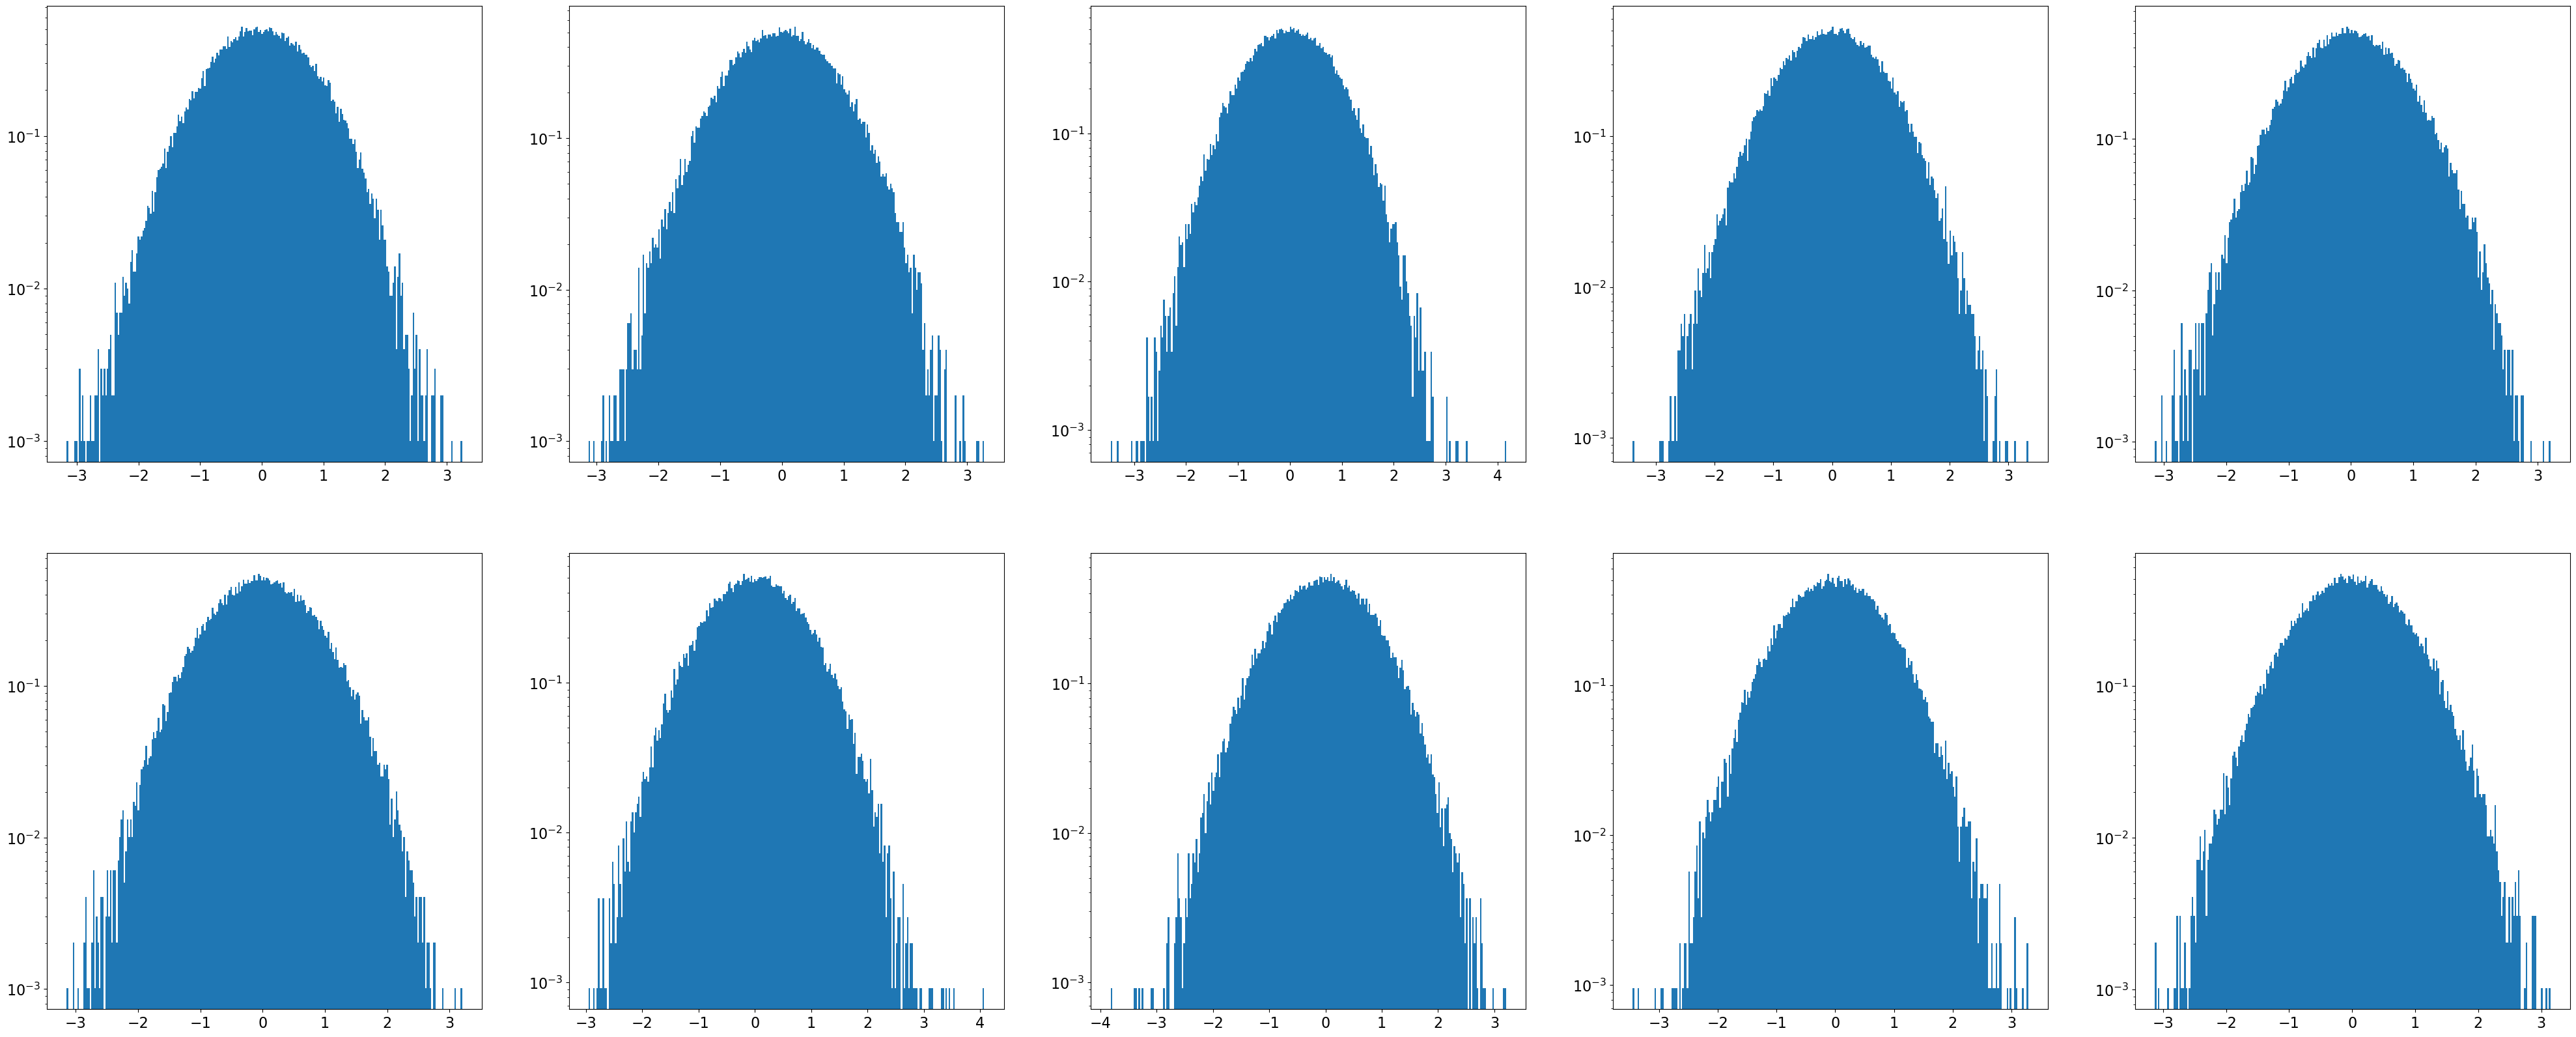

In [35]:
#distribution of the noise
fig, ax = plt.subplots(2,5, figsize = (50,20))
for i in range(5):
    ax[0,i].hist(noise[i].ravel(), density = True, bins = 256)
    ax[0,i].semilogy()
for i in range(5):
    ax[1,i].hist(noise[i+4].ravel(), density = True, bins = 256)
    ax[1,i].semilogy()

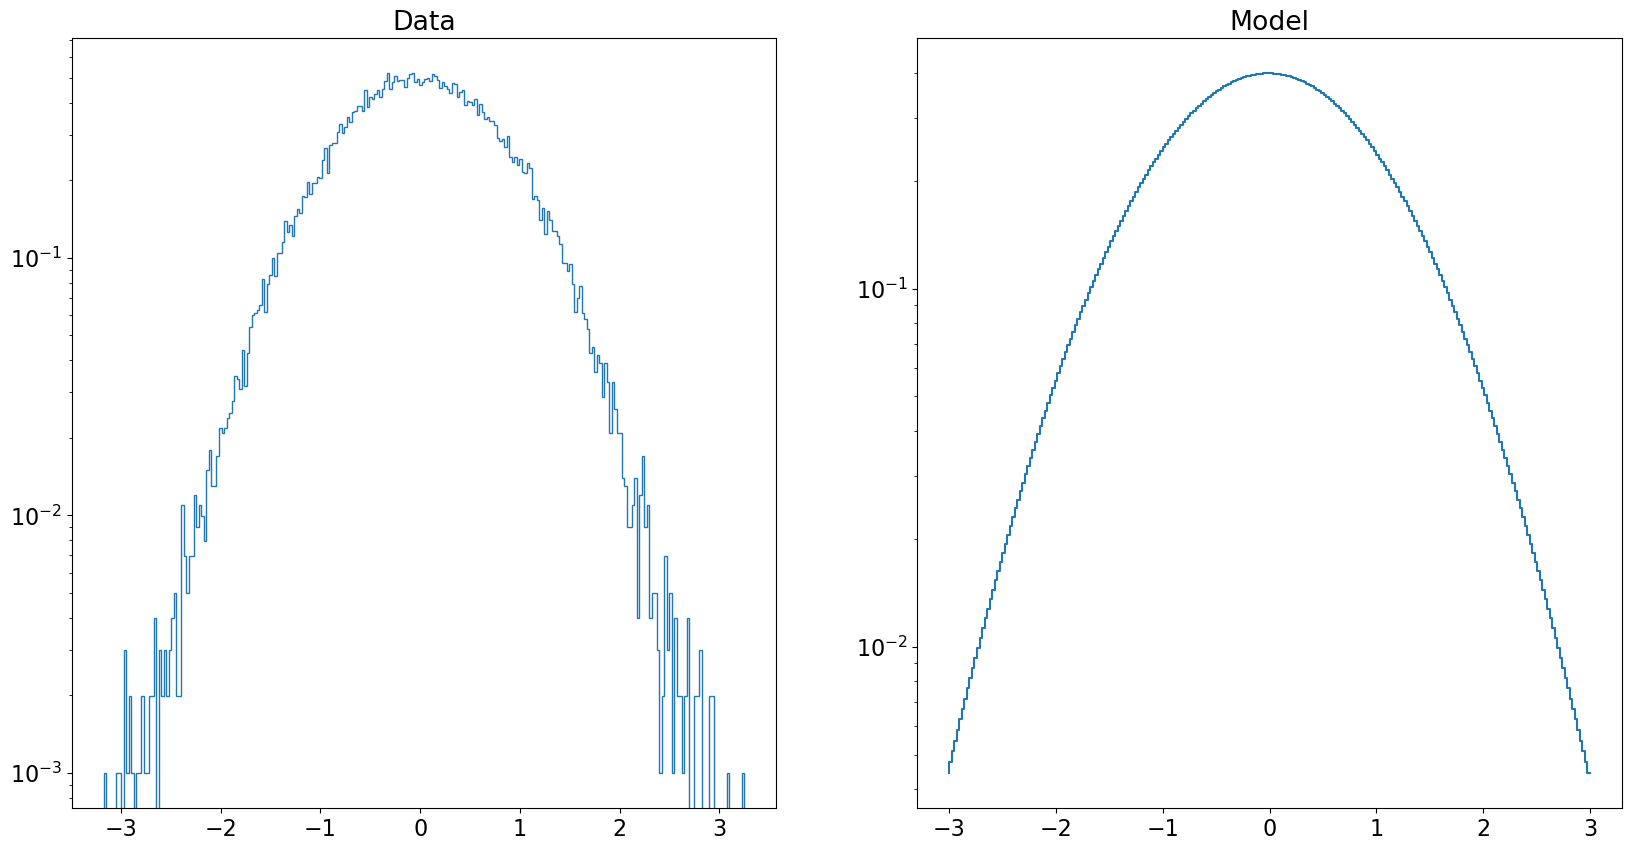

In [38]:
#distribution of noise vs distribution of model
x = np.linspace(-3,3, num = 256)
bkgd = stats.norm.pdf(x)

fig, ax = plt.subplots(1,2, figsize = (20,10))
ax[0].hist(noise[0].ravel(), density = True, bins = 256, histtype = 'step')
ax[0].semilogy()
ax[0].set_title('Data')

ax[1].step(x, bkgd)
ax[1].semilogy()
ax[1].set_title('Model')
plt.show()

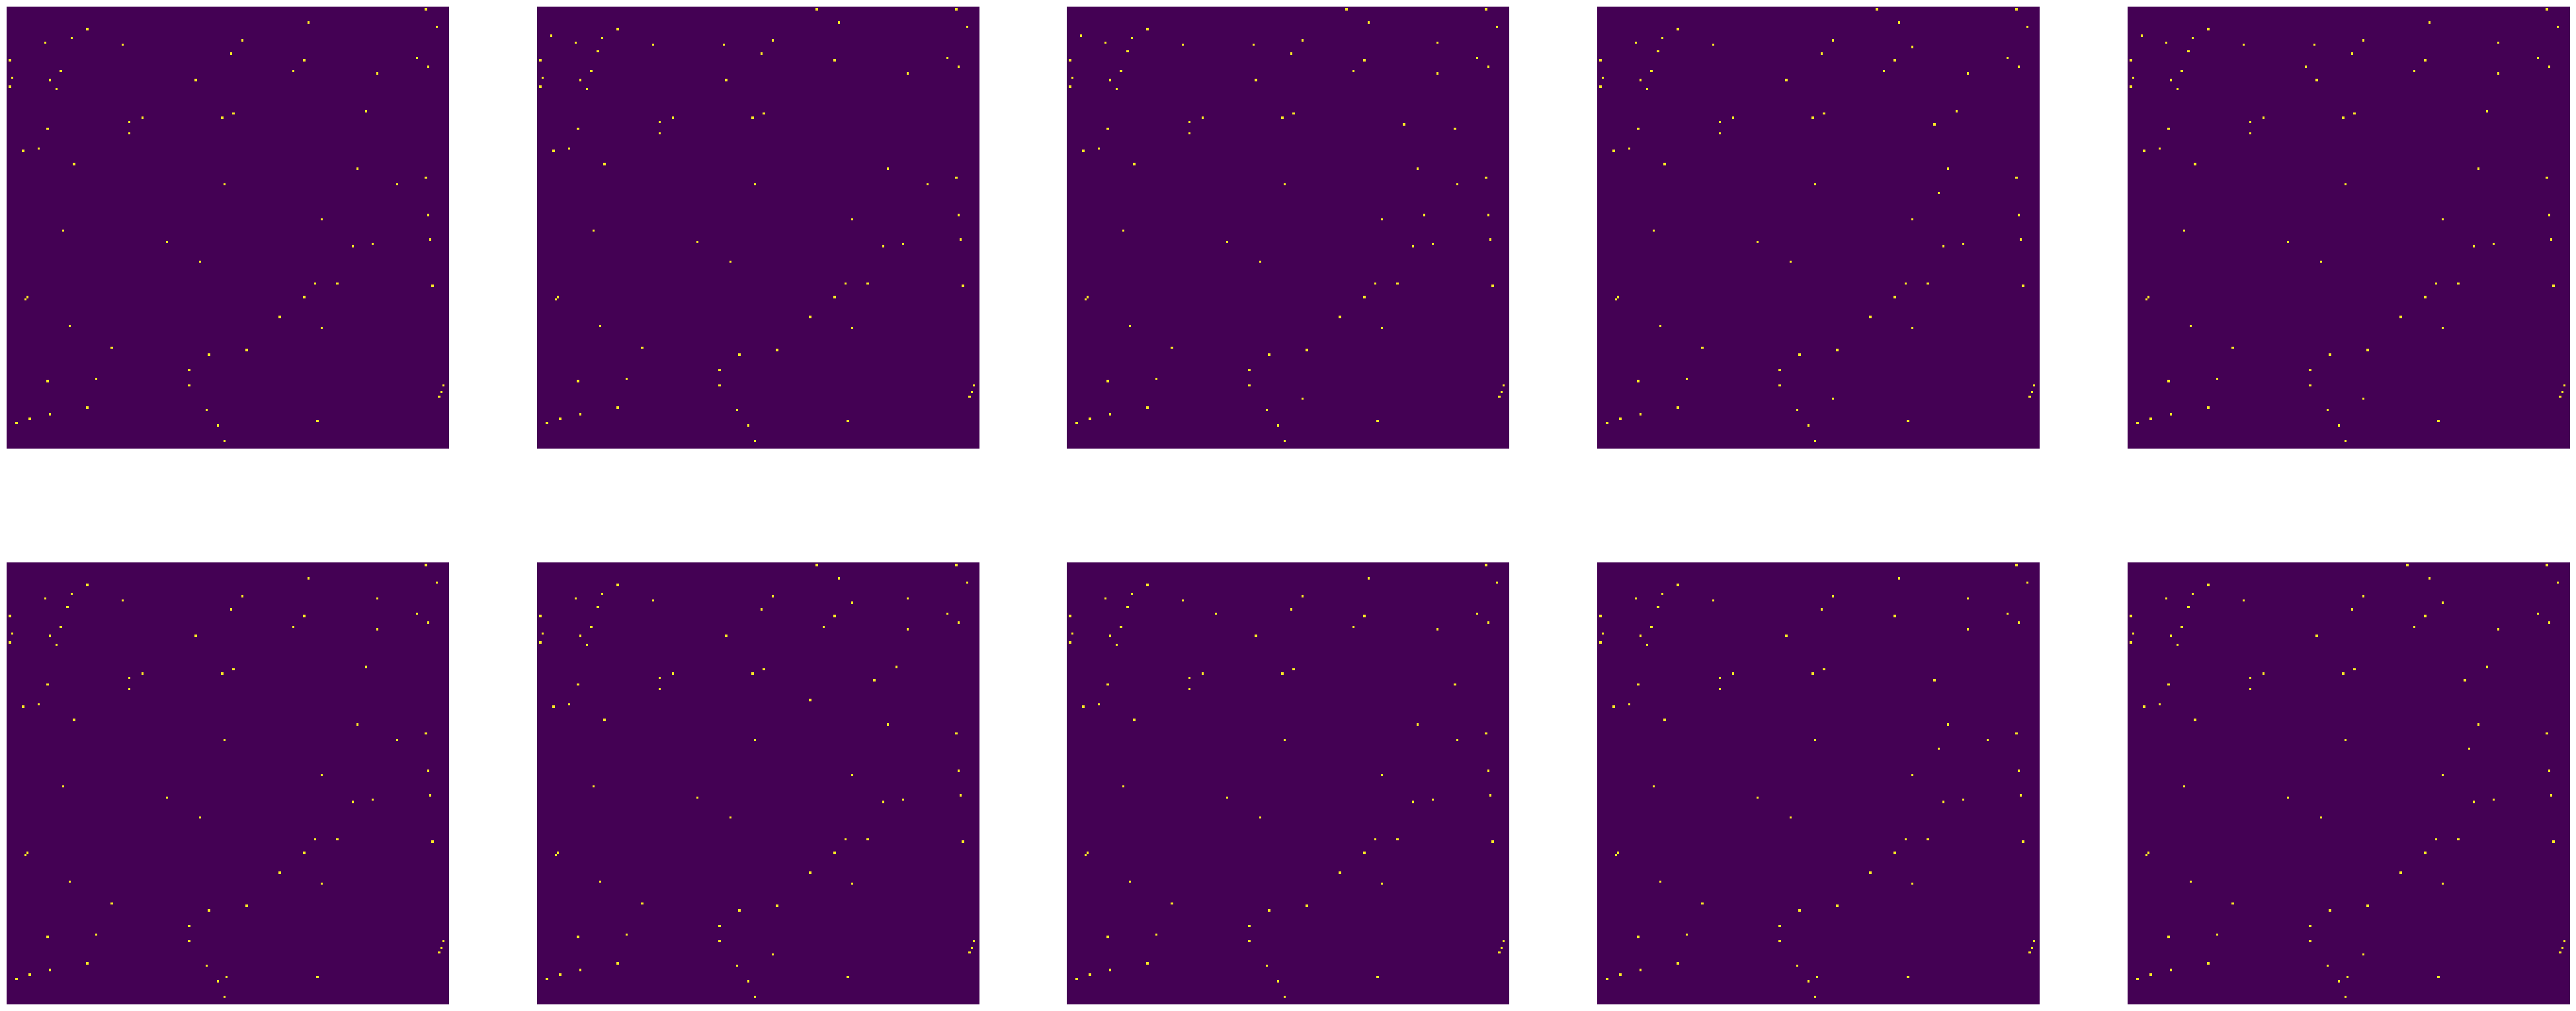

In [31]:
prob5sigma = 1/3.5e6
signal = np.abs(stats.norm.ppf(prob5sigma))

fig, ax = plt.subplots(2,5, figsize = (50,20))
for i in range(5):
    ax[0,i].imshow(images[i]>signal)
    ax[0,i].axis('off')
for i in range(5):
    ax[1,i].imshow(images[i+5]>signal)
    ax[1,i].axis('off')
plt.show()

The plot above shows the stars in yellow. The images were filtered so that only signals stronger than 5$\sigma$ are shown. 

Although we started with the same data, the background distributions are different because we used different methods of isolating the noise. 